In [1]:
#importing lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
# eda
df.shape

(5630, 20)

In [4]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [5]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [6]:
#treating null values
df.drop(['CustomerID'],axis=1,inplace=True)

In [7]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('the total null values are:', df[i].isnull().sum())
        print('the datatype is', df[i].dtypes)
        print()

Tenure
the total null values are: 264
the datatype is float64

WarehouseToHome
the total null values are: 251
the datatype is float64

HourSpendOnApp
the total null values are: 255
the datatype is float64

OrderAmountHikeFromlastYear
the total null values are: 265
the datatype is float64

CouponUsed
the total null values are: 256
the datatype is float64

OrderCount
the total null values are: 258
the datatype is float64

DaySinceLastOrder
the total null values are: 307
the datatype is float64



In [8]:
df['Churn'] = df['Churn'].astype('object')
df['CityTier'] = df['CityTier'].astype('object')

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.00,3.0000,16.00


In [10]:
#treating outliers
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].median(),inplace=True)

Text(0, 0.5, 'Values')

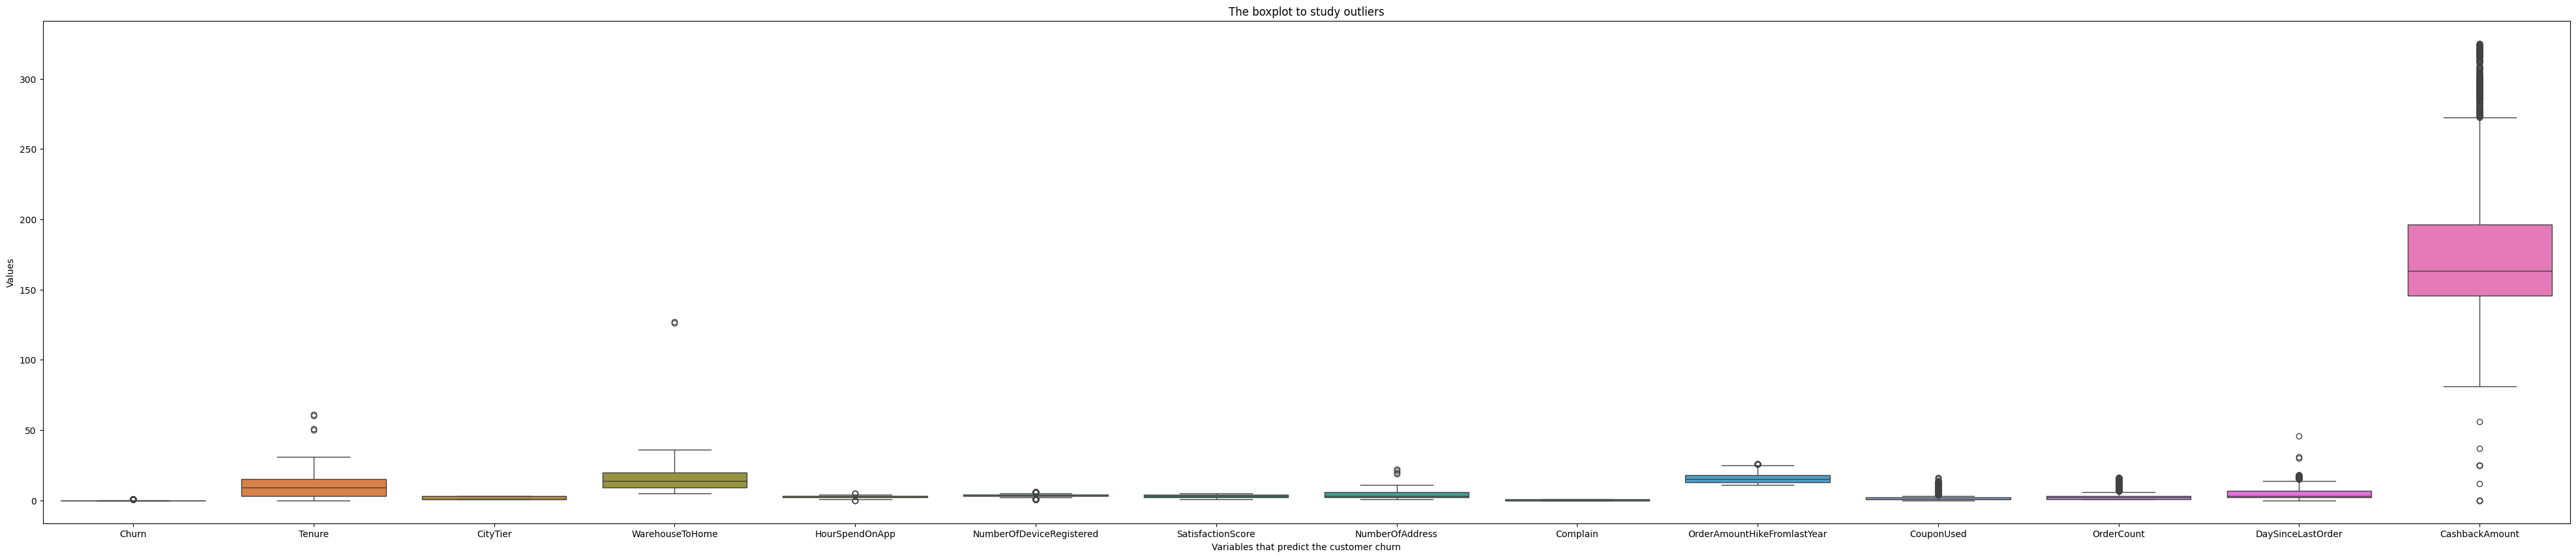

In [11]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

In [12]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [13]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [14]:
for column in df.columns:
    if df[column].dtype != 'object':
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])


Text(0, 0.5, 'Values')

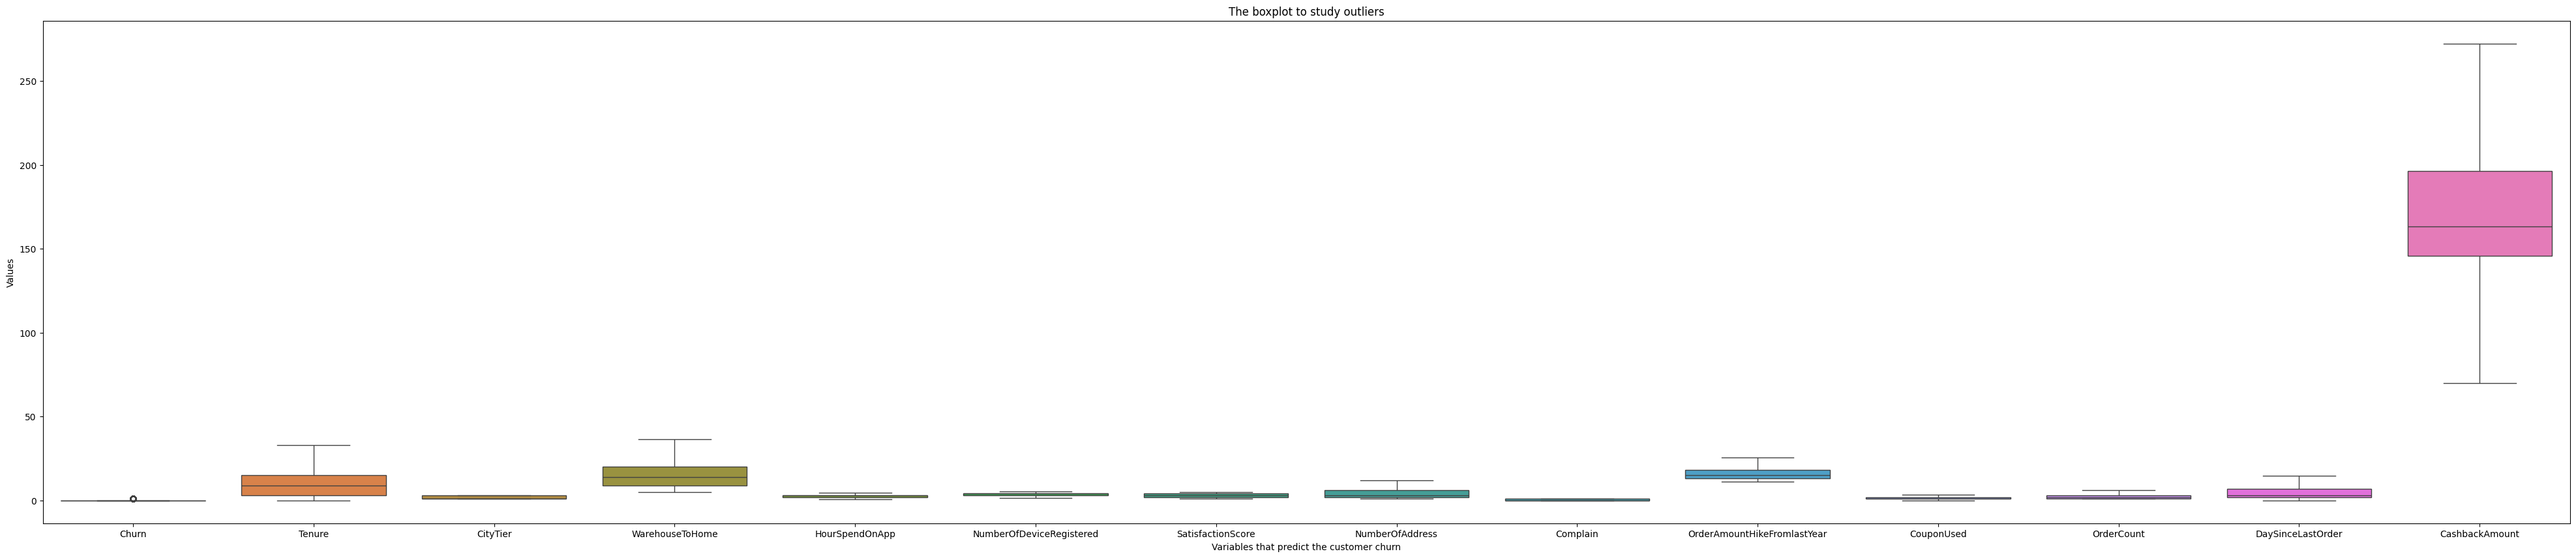

In [15]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

<ipython-input-16-974ef1362404>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

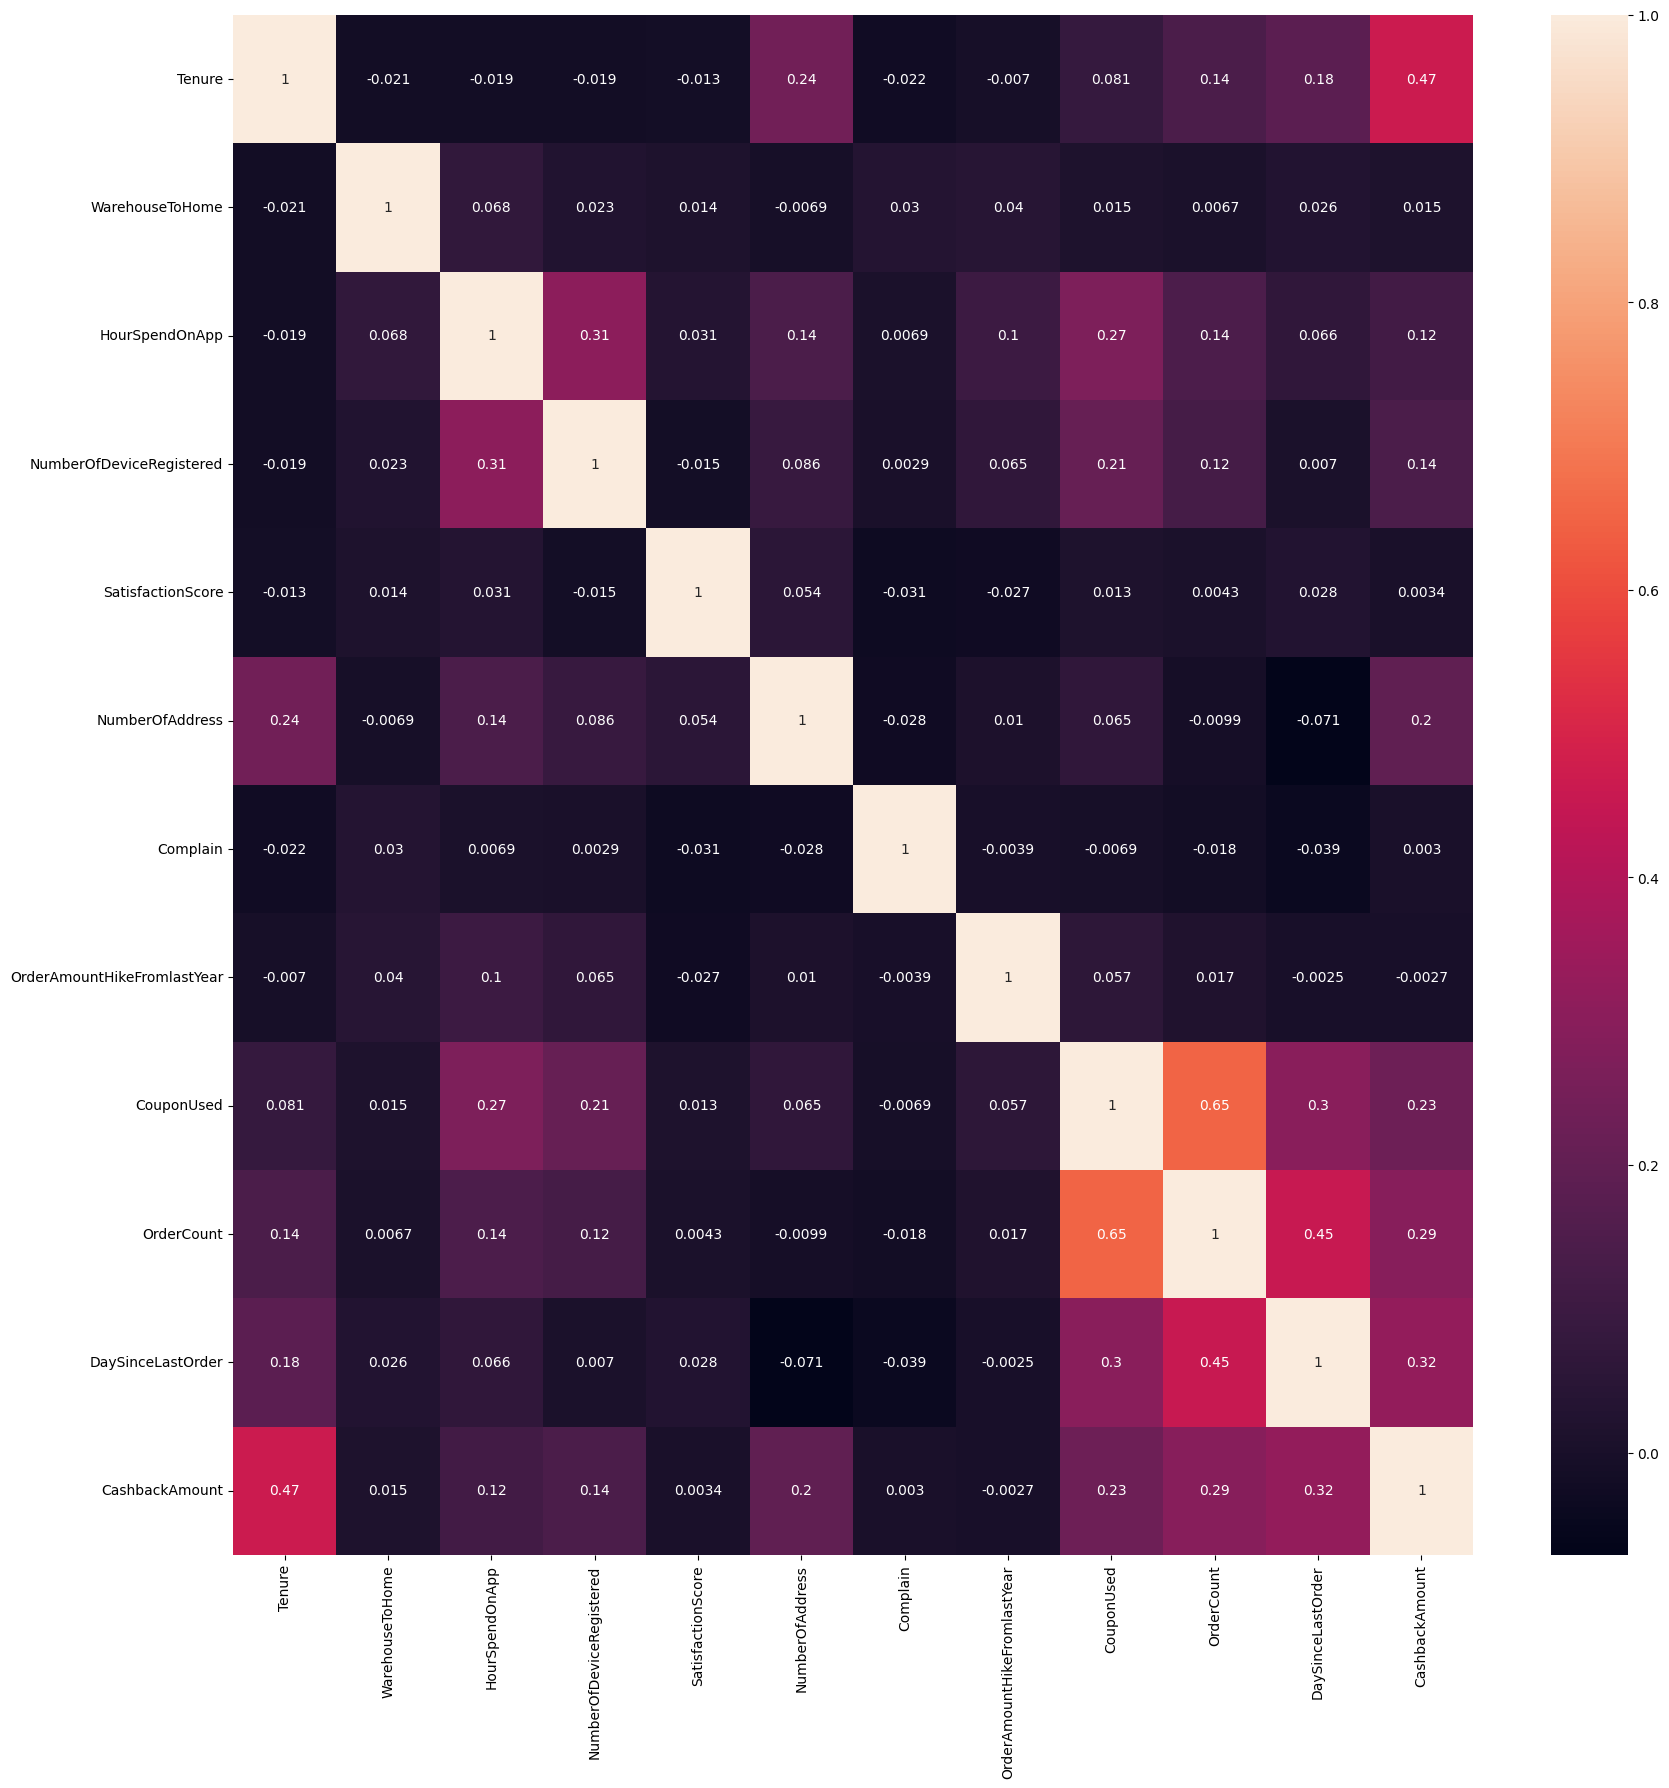

In [16]:
#heatmap for feature correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [17]:
df_encoded=df.copy()
df_encoded.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60


In [18]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
num =  ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [19]:
#encoding
df_encoded = pd.get_dummies(df_encoded,drop_first=True)

<ipython-input-19-0e5b7bbb6500>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_encoded = pd.get_dummies(df_encoded,drop_first=True)
<ipython-input-19-0e5b7bbb6500>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_encoded = pd.get_dummies(df_encoded,drop_first=True)


In [20]:
df_encoded.head(10)

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,4.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
1,9.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,...,0,1,1,0,0,1,0,0,0,1
2,9.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,...,0,0,1,0,0,1,0,0,0,1
3,0.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,...,0,0,1,0,1,0,0,0,0,1
4,0.0,12.0,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,...,0,0,1,0,0,1,0,0,0,1
5,0.0,22.0,3.0,5.0,5.0,2.0,1.0,22.0,3.5,6.0,...,0,0,0,0,0,0,1,0,0,1
6,9.0,11.0,2.0,3.0,2.0,4.0,0.0,14.0,0.0,1.0,...,0,0,1,0,1,0,0,0,0,0
7,9.0,6.0,3.0,3.0,2.0,3.0,1.0,16.0,2.0,2.0,...,0,0,1,0,0,1,0,0,0,0
8,13.0,9.0,3.0,4.0,3.0,2.0,1.0,14.0,0.0,1.0,...,1,0,1,0,0,1,0,0,0,0
9,9.0,31.0,2.0,5.0,3.0,2.0,0.0,12.0,1.0,1.0,...,0,0,1,0,0,1,0,0,0,1


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
#standardisation
scaler = StandardScaler()

In [23]:
features = df_encoded[num]
features = scaler.fit_transform(features)

In [24]:
scaled_df_encoded = df_encoded.copy()
scaled_df_encoded[num] = features
scaled_df_encoded

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,-0.737959,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,...,0,0,0,0,1,0,0,0,0,1
1,-0.134866,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,...,0,1,1,0,0,1,0,0,0,1
2,-0.134866,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,...,0,0,1,0,0,1,0,0,0,1
3,-1.220433,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,...,0,0,1,0,1,0,0,0,0,1
4,-1.220433,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,-0.014247,1.788340,0.092878,-1.799993,-1.497592,0.701405,-0.631198,0.649917,-0.411136,-0.304276,...,0,0,1,0,1,0,0,0,1,0
5626,0.347609,-0.313381,0.092878,1.384951,1.400807,0.701405,-0.631198,0.091648,-0.411136,-0.304276,...,0,0,1,0,0,0,0,0,1,0
5627,-1.099814,-0.560642,0.092878,-1.799993,0.676207,-0.472817,1.584290,1.487320,-0.411136,-0.304276,...,0,0,1,0,1,0,0,0,1,0
5628,1.553794,-0.807903,1.513809,1.384951,0.676207,-0.081410,-0.631198,-0.187486,0.522397,-0.304276,...,0,0,1,0,1,0,0,0,1,0


In [25]:
print(scaled_df_encoded.columns)



Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Churn_1',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'CityTier_2', 'CityTier_3', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Male', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')


In [26]:
from sklearn.model_selection import train_test_split

#train,test  split
X = scaled_df_encoded.drop(['Churn_1'], axis=1)
y = scaled_df_encoded['Churn_1']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
#lib for DL model building
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

Baseline

In [28]:
# Baseline DNN Architecture
baseline_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

In [29]:
# Train the model
baseline_history = baseline_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/20
141/141 [==============================] - 6s 14ms/step - loss: 0.3623 - accuracy: 0.8477 - val_loss: 0.2887 - val_accuracy: 0.8917
Epoch 2/20
141/141 [==============================] - 1s 9ms/step - loss: 0.2778 - accuracy: 0.8905 - val_loss: 0.2647 - val_accuracy: 0.8979
Epoch 3/20
141/141 [==============================] - 1s 8ms/step - loss: 0.2576 - accuracy: 0.8985 - val_loss: 0.2509 - val_accuracy: 0.9041
Epoch 4/20
141/141 [==============================] - 1s 8ms/step - loss: 0.2417 - accuracy: 0.9025 - val_loss: 0.2452 - val_accuracy: 0.9121
Epoch 5/20
141/141 [==============================] - 1s 8ms/step - loss: 0.2224 - accuracy: 0.9119 - val_loss: 0.2359 - val_accuracy: 0.9085
Epoch 6/20
141/141 [==============================] - 2s 11ms/step - loss: 0.2016 - accuracy: 0.9194 - val_loss: 0.2206 - val_accuracy: 0.9192
Epoch 7/20
141/141 [==============================] - 1s 6ms/step - loss: 0.1872 - accuracy: 0.9270 - val_loss: 0.2223 - val_accuracy: 0.9147
Epoc

Dropout

In [30]:
# Dropout DNN Architecture
dropout_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),#0.5 dropout rate
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),#0.5 dropout rate
    layers.Dense(1, activation='sigmoid')
])

In [31]:
dropout_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])


In [32]:
# Train the dropout model
dropout_history = dropout_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/20
141/141 [==============================] - 3s 5ms/step - loss: 0.4521 - accuracy: 0.8113 - val_loss: 0.3265 - val_accuracy: 0.8668
Epoch 2/20
141/141 [==============================] - 1s 4ms/step - loss: 0.3430 - accuracy: 0.8595 - val_loss: 0.2912 - val_accuracy: 0.8908
Epoch 3/20
141/141 [==============================] - 1s 4ms/step - loss: 0.3203 - accuracy: 0.8752 - val_loss: 0.2776 - val_accuracy: 0.9014
Epoch 4/20
141/141 [==============================] - 1s 4ms/step - loss: 0.3116 - accuracy: 0.8777 - val_loss: 0.2705 - val_accuracy: 0.9023
Epoch 5/20
141/141 [==============================] - 1s 4ms/step - loss: 0.3025 - accuracy: 0.8830 - val_loss: 0.2625 - val_accuracy: 0.9050
Epoch 6/20
141/141 [==============================] - 1s 4ms/step - loss: 0.2893 - accuracy: 0.8819 - val_loss: 0.2595 - val_accuracy: 0.9023
Epoch 7/20
141/141 [==============================] - 1s 4ms/step - loss: 0.2786 - accuracy: 0.8899 - val_loss: 0.2534 - val_accuracy: 0.9147
Epoch 

Layer wise dropout

In [33]:
# Layer-wise Dropout DNN Architecture
layer_wise_dropout_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),#0.2
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),#0.3
    layers.Dense(1, activation='sigmoid')
])

In [34]:
layer_wise_dropout_model.compile(optimizer='adam',
                                 loss='binary_crossentropy',
                                 metrics=['accuracy'])


In [35]:
# Train the layer-wise dropout model
layer_wise_dropout_history = layer_wise_dropout_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/20
141/141 [==============================] - 5s 9ms/step - loss: 0.3849 - accuracy: 0.8408 - val_loss: 0.2920 - val_accuracy: 0.8908
Epoch 2/20
141/141 [==============================] - 1s 7ms/step - loss: 0.3015 - accuracy: 0.8777 - val_loss: 0.2697 - val_accuracy: 0.9005
Epoch 3/20
141/141 [==============================] - 1s 8ms/step - loss: 0.2906 - accuracy: 0.8803 - val_loss: 0.2651 - val_accuracy: 0.9023
Epoch 4/20
141/141 [==============================] - 1s 8ms/step - loss: 0.2776 - accuracy: 0.8914 - val_loss: 0.2491 - val_accuracy: 0.9112
Epoch 5/20
141/141 [==============================] - 1s 8ms/step - loss: 0.2626 - accuracy: 0.8950 - val_loss: 0.2430 - val_accuracy: 0.9112
Epoch 6/20
141/141 [==============================] - 1s 7ms/step - loss: 0.2550 - accuracy: 0.8979 - val_loss: 0.2395 - val_accuracy: 0.9165
Epoch 7/20
141/141 [==============================] - 1s 9ms/step - loss: 0.2448 - accuracy: 0.9036 - val_loss: 0.2319 - val_accuracy: 0.9139
Epoch 

Monte Carlo dropout

In [36]:
# Monte Carlo Dropout DNN Architecture
monte_carlo_dropout_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [37]:
monte_carlo_dropout_model.compile(optimizer='adam',
                                  loss='binary_crossentropy',
                                  metrics=['accuracy'])


In [38]:
monte_carlo_dropout_history = monte_carlo_dropout_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/20
141/141 [==============================] - 2s 8ms/step - loss: 0.4205 - accuracy: 0.8195 - val_loss: 0.3139 - val_accuracy: 0.8650
Epoch 2/20
141/141 [==============================] - 1s 6ms/step - loss: 0.3284 - accuracy: 0.8657 - val_loss: 0.2867 - val_accuracy: 0.8952
Epoch 3/20
141/141 [==============================] - 1s 4ms/step - loss: 0.3146 - accuracy: 0.8666 - val_loss: 0.2768 - val_accuracy: 0.9023
Epoch 4/20
141/141 [==============================] - 1s 4ms/step - loss: 0.3016 - accuracy: 0.8730 - val_loss: 0.2666 - val_accuracy: 0.9023
Epoch 5/20
141/141 [==============================] - 1s 4ms/step - loss: 0.2907 - accuracy: 0.8814 - val_loss: 0.2594 - val_accuracy: 0.9076
Epoch 6/20
141/141 [==============================] - 1s 4ms/step - loss: 0.2860 - accuracy: 0.8817 - val_loss: 0.2596 - val_accuracy: 0.9059
Epoch 7/20
141/141 [==============================] - 1s 4ms/step - loss: 0.2710 - accuracy: 0.8932 - val_loss: 0.2499 - val_accuracy: 0.9121
Epoch 

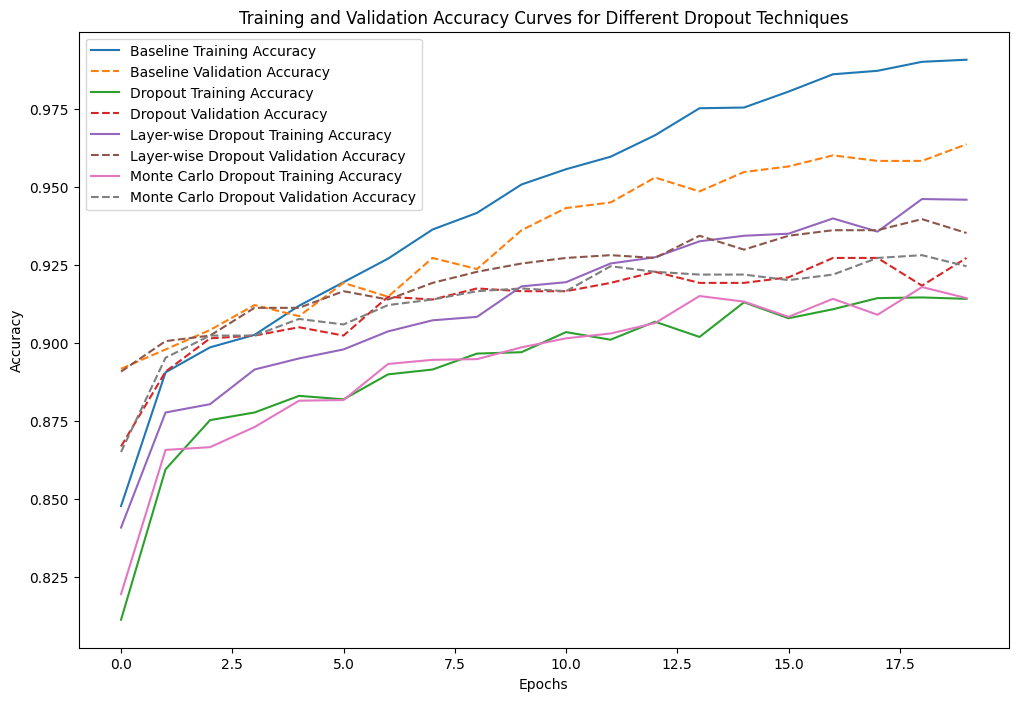

In [39]:
# Visualize training and validation accuracy/loss curves for all models
plt.figure(figsize=(12, 8))

# Baseline model
plt.plot(baseline_history.history['accuracy'], label='Baseline Training Accuracy', linestyle='-')
plt.plot(baseline_history.history['val_accuracy'], label='Baseline Validation Accuracy', linestyle='--')

# Dropout model
plt.plot(dropout_history.history['accuracy'], label='Dropout Training Accuracy', linestyle='-')
plt.plot(dropout_history.history['val_accuracy'], label='Dropout Validation Accuracy', linestyle='--')

# Layer-wise dropout model
plt.plot(layer_wise_dropout_history.history['accuracy'], label='Layer-wise Dropout Training Accuracy', linestyle='-')
plt.plot(layer_wise_dropout_history.history['val_accuracy'], label='Layer-wise Dropout Validation Accuracy', linestyle='--')

# Monte Carlo dropout model
plt.plot(monte_carlo_dropout_history.history['accuracy'], label='Monte Carlo Dropout Training Accuracy', linestyle='-')
plt.plot(monte_carlo_dropout_history.history['val_accuracy'], label='Monte Carlo Dropout Validation Accuracy', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curves for Different Dropout Techniques')
plt.legend()
plt.show()


In [47]:
# metrics
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score

# Predictions for each model
baseline_probs = baseline_model.predict(X_val)
dropout_probs = dropout_model.predict(X_val)
layer_wise_dropout_probs = layer_wise_dropout_model.predict(X_val)
monte_carlo_dropout_probs = monte_carlo_dropout_model.predict(X_val)

# Convert probabilities to binary predictions
baseline_preds = (baseline_probs > 0.5).astype(int)
dropout_preds = (dropout_probs > 0.5).astype(int)
layer_wise_dropout_preds = (layer_wise_dropout_probs > 0.5).astype(int)
monte_carlo_dropout_preds = (monte_carlo_dropout_probs > 0.5).astype(int)

# Accuracy scores
baseline_accuracy = accuracy_score(y_val, baseline_preds)
dropout_accuracy = accuracy_score(y_val, dropout_preds)
layer_wise_dropout_accuracy = accuracy_score(y_val, layer_wise_dropout_preds)
monte_carlo_dropout_accuracy = accuracy_score(y_val, monte_carlo_dropout_preds)

# F1 scores
baseline_f1 = f1_score(y_val, baseline_preds)
dropout_f1 = f1_score(y_val, dropout_preds)
layer_wise_dropout_f1 = f1_score(y_val, layer_wise_dropout_preds)
monte_carlo_dropout_f1 = f1_score(y_val, monte_carlo_dropout_preds)

# ROC curves and AUC scores
baseline_auc = roc_auc_score(y_val, baseline_preds)
dropout_auc = roc_auc_score(y_val, dropout_preds)
layer_wise_dropout_auc = roc_auc_score(y_val, layer_wise_dropout_preds)
monte_carlo_dropout_auc = roc_auc_score(y_val, monte_carlo_dropout_preds)



36/36 [==============================] - 0s 2ms/step


In [48]:
# Print performance metrics
print("Accuracy Scores:")
print(f"Baseline: {baseline_accuracy:.4f}")
print(f"With Dropout: {dropout_accuracy:.4f}")
print(f"With Layer-wise Dropout: {layer_wise_dropout_accuracy:.4f}")
print(f"With Monte Carlo Dropout: {monte_carlo_dropout_accuracy:.4f}\n")

print("F1 Scores:")
print(f"Baseline: {baseline_f1:.4f}")
print(f"With Dropout: {dropout_f1:.4f}")
print(f"With Layer-wise Dropout: {layer_wise_dropout_f1:.4f}")
print(f"With Monte Carlo Dropout: {monte_carlo_dropout_f1:.4f}\n")

print("ROC AUC Scores:")
print(f"Baseline: {baseline_auc:.4f}")
print(f"With Dropout: {dropout_auc:.4f}")
print(f"With Layer-wise Dropout: {layer_wise_dropout_auc:.4f}")
print(f"With Monte Carlo Dropout: {monte_carlo_dropout_auc:.4f}\n")

Accuracy Scores:
Baseline: 0.9636
With Dropout: 0.9272
With Layer-wise Dropout: 0.9352
With Monte Carlo Dropout: 0.9245

F1 Scores:
Baseline: 0.8839
With Dropout: 0.7303
With Layer-wise Dropout: 0.7908
With Monte Carlo Dropout: 0.7352

ROC AUC Scores:
Baseline: 0.9152
With Dropout: 0.7957
With Layer-wise Dropout: 0.8592
With Monte Carlo Dropout: 0.8094



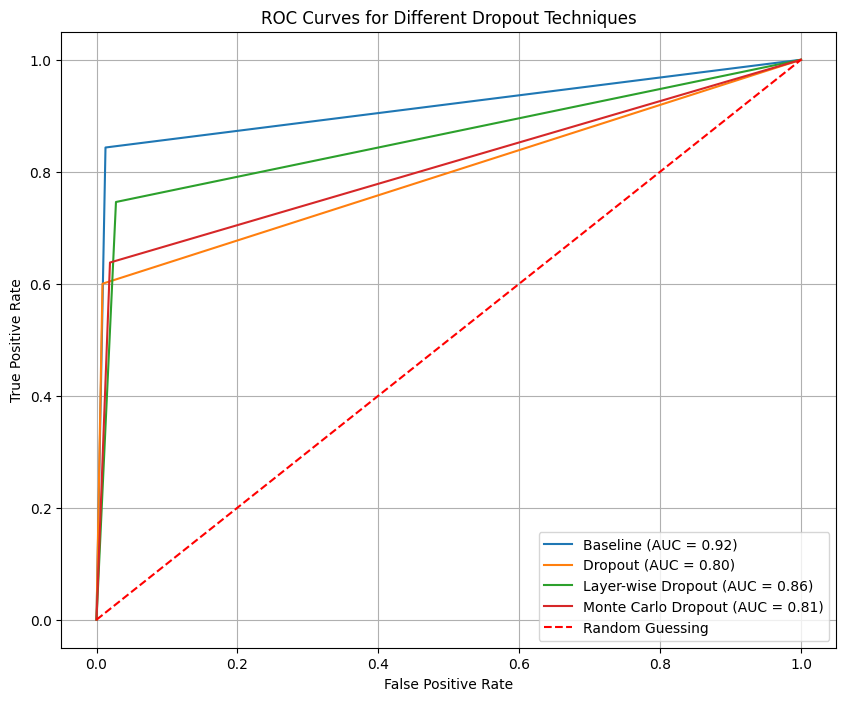

In [49]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_val, baseline_preds)
plt.plot(fpr, tpr, label=f'Baseline (AUC = {baseline_auc:.2f})')

fpr, tpr, _ = roc_curve(y_val, dropout_preds)
plt.plot(fpr, tpr, label=f'Dropout (AUC = {dropout_auc:.2f})')

fpr, tpr, _ = roc_curve(y_val, layer_wise_dropout_preds)
plt.plot(fpr, tpr, label=f'Layer-wise Dropout (AUC = {layer_wise_dropout_auc:.2f})')

fpr, tpr, _ = roc_curve(y_val, monte_carlo_dropout_preds)
plt.plot(fpr, tpr, label=f'Monte Carlo Dropout (AUC = {monte_carlo_dropout_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Dropout Techniques')
plt.legend()
plt.grid()
plt.show()


